<a href="https://colab.research.google.com/github/william-monroy/Obtencion-de-Estadistica-Descriptiva/blob/master/Patrones_con_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad Evaluable: Patrones con K-means**

*Equipo 4 - Integrantes:*

*William Frank Monroy Mamani - A00829796*

*José Moisés López Alanís - A01284506*

*Sergio Eduardo Chavez Villegas - A01284297*

*Ezequiel Lozano Guerrero - A01734172*

*Jose Manuel Caceres Esponda - A00831382*


In [63]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv('wine-clustering.csv')
dataset.head()
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset))


## **Selección de variables**


In [64]:
df = dataset.iloc[:,[0,1]].values
df

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.

## **Valor de k**

Text(0.5, 1.0, 'Método del codo')

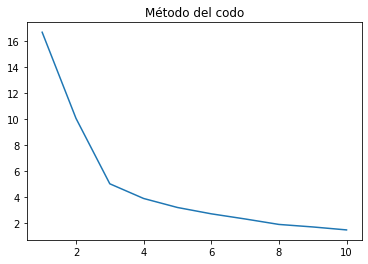

In [65]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
val=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    val.append(kmeans.inertia_)
plt.plot(range(1,11),val)
plt.title('Método del codo')

In [66]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 0 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 2 2
 1 1 2 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 1 2 0 1 0 0 0 2 2 0 0 0 0 2 0 0 0 2 0 1 1 2 0 0 0 2 0]


## **Visualizar clusters**

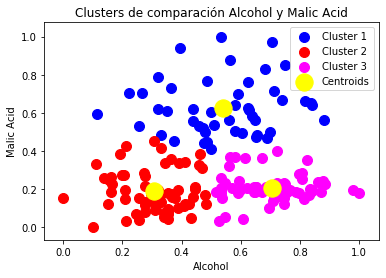

In [67]:
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s=100 , c ='blue', label='Cluster 1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s=100 , c ='red', label='Cluster 2')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s=100 , c ='magenta', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de comparación Alcohol y Malic Acid')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.show()


## Si utilizaras más de dos variables, ¿Cuáles seleccionarías? Justifica tu respuesta.

 Observamos con el mapa de calor, las correlaciones de las diferentes variables y encontramos que la variable de Alcohol y de Malic Acid tienen una correlación que se beneficiaría del análisis en clusters

## ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?


Si, porque la variación que tiene entre los datos de estos centros es óptima, después de haber probado con otros posicionamientos, el algoritmo pudo encontrar el mejor caso comparándolos.  

## ¿Cómo obtuviste el valor de k a usar?

Con la ayuda de la tecnica punto codo pudimos observar donde estaba teniendo un cambio y de ahi agarrramos que nuestra k seria el 3.